In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd

df= pd.read_csv("/content/drive/MyDrive/make data count kaggle/make-data-count-finding-data-references (1)/mapped_data.csv")

In [7]:
df

,article_id,dataset_id,type,text
0,10.1002_2017jc013030,https://doi.org/10.17882/49388,Primary,PUBLICATIONS\nJournal of Geophysical Research:...
1,10.1002_anie.201916483,https://doi.org/10.5517/ccdc.csd.cc1npvt0,Missing,Angewandte\nChemie Research Articles\nInternat...
2,10.1002_anie.202005531,https://doi.org/10.5517/ccdc.csd.cc24wxqp,Missing,Angewandte\nChemie Communications\nArenes\nHow...
3,10.1002_anie.202007717,https://doi.org/10.5517/ccdc.csd.cc24rrb0,Missing,Angewandte\nChemie Research Articles\nDynamic ...
4,10.1002_chem.201902131,https://doi.org/10.5517/ccdc.csd.cc221dk3,Missing,Full Paper DOI: 10.1002/chem.201902131\n& Nitr...
...,...,...,...,...
1061,10.7717_peerj.12422,https://doi.org/10.15468/dl.t3h8b4,Secondary,Spatial and temporal distribution patterns of ...
1062,10.7717_peerj.12422,https://doi.org/10.15468/dl.yak5vd,Secondary,Spatial and temporal distribution patterns of ...
1063,10.7717_peerj.13193,https://doi.org/10.6073/pasta/02e2764efb408a8b...,Secondary,Foliar nutrient concentrations of six northern...
1064,10.7717_peerj.13193,https://doi.org/10.6073/pasta/275ad28a2f31356c...,Secondary,Foliar nutrient concentrations of six northern...


Rows: 1066
Unique Articles: 523
Unique Datasets: 1066

Type Distribution:
 type
Secondary    449
Missing      347
Primary      270
Name: count, dtype: int64

Text Length Stats:
 count      1066.000000
mean      64532.666041
std       39259.135198
min        1284.000000
25%       39929.000000
50%       60488.500000
75%       79533.750000
max      250048.000000
Name: text_length, dtype: float64

Word Count Stats:
 count     1066.000000
mean      9608.591932
std       5649.902151
min        172.000000
25%       5996.000000
50%       8938.500000
75%      11631.000000
max      32766.000000
Name: word_count, dtype: float64


/tmp/ipython-input-2201067849.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="type", data=df, order=df["type"].value_counts().index, palette="Set2")


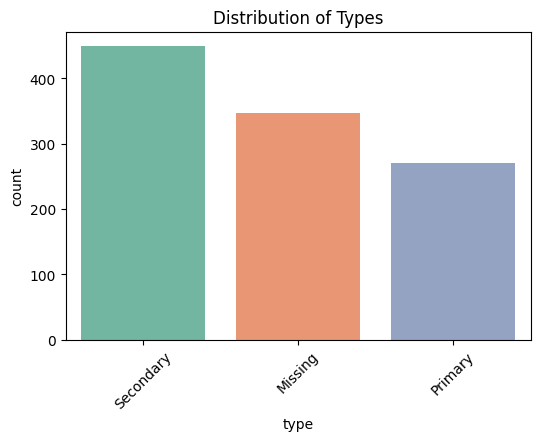

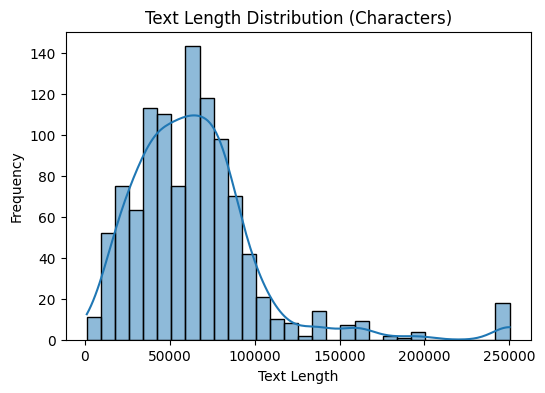

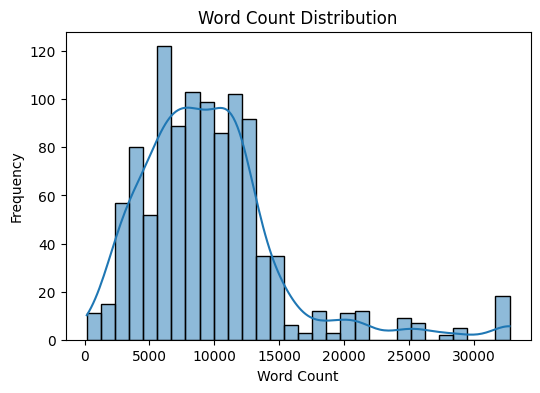

/tmp/ipython-input-2201067849.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="type", y="text_length", data=df, palette="Set3")


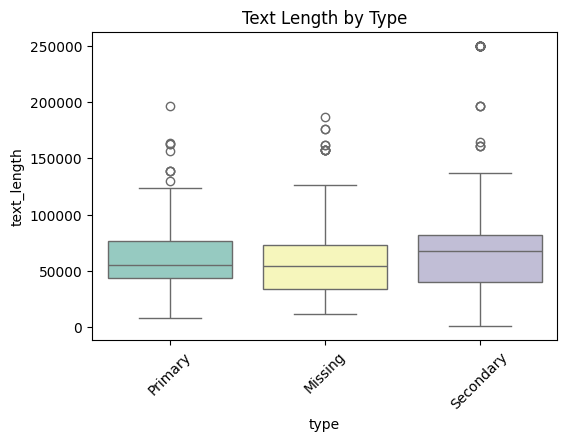

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# --- Feature Engineering ---
# Text length in characters
df["text_length"] = df["text"].str.len()

# Word count in each text
df["word_count"] = df["text"].str.split().str.len()

# --- Basic Info ---
print("Rows:", len(df))
print("Unique Articles:", df["article_id"].nunique())
print("Unique Datasets:", df["dataset_id"].nunique())
print("\nType Distribution:\n", df["type"].value_counts())
print("\nText Length Stats:\n", df["text_length"].describe())
print("\nWord Count Stats:\n", df["word_count"].describe())

# --- Visualization Section ---

# 1. Type distribution
plt.figure(figsize=(6,4))
sns.countplot(x="type", data=df, order=df["type"].value_counts().index, palette="Set2")
plt.title("Distribution of Types")
plt.xticks(rotation=45)
plt.show()

# 2. Text length distribution
plt.figure(figsize=(6,4))
sns.histplot(df["text_length"], bins=30, kde=True)
plt.title("Text Length Distribution (Characters)")
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.show()

# 3. Word count distribution
plt.figure(figsize=(6,4))
sns.histplot(df["word_count"], bins=30, kde=True)
plt.title("Word Count Distribution")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

# 4. Average text length by type
plt.figure(figsize=(6,4))
sns.boxplot(x="type", y="text_length", data=df, palette="Set3")
plt.title("Text Length by Type")
plt.xticks(rotation=45)
plt.show()


In [11]:
import nltk
nltk.download("punkt")
nltk.download("punkt_tab")

# Sentence count
df["sentence_count"] = df["text"].apply(lambda x: len(nltk.sent_tokenize(str(x))))

print(df["sentence_count"].describe())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


count    1066.000000
mean      584.008443
std       303.479210
min        12.000000
25%       363.000000
50%       554.000000
75%       784.000000
max      2837.000000
Name: sentence_count, dtype: float64


In [12]:


# --- Sentence Tokenization ---
df["sentences"] = df["text"].apply(lambda x: nltk.sent_tokenize(str(x)))

# --- Words per sentence ---
def words_per_sentence(text):
    sentences = nltk.sent_tokenize(str(text))
    return [len(s.split()) for s in sentences]

df["words_per_sentence"] = df["text"].apply(words_per_sentence)

# Average words per sentence for each article
df["avg_words_per_sentence"] = df["words_per_sentence"].apply(lambda x: sum(x)/len(x) if len(x) > 0 else 0)

# --- Stats ---
print("\nOverall Words per Sentence Stats:")
all_sentence_lengths = [w for row in df["words_per_sentence"] for w in row]  # flatten
print(pd.Series(all_sentence_lengths).describe())

print("\nAverage Words per Sentence (per article):")
print(df["avg_words_per_sentence"].describe())



Overall Words per Sentence Stats:
count    622553.000000
mean         16.464802
std          28.548451
min           1.000000
25%           3.000000
50%          12.000000
75%          23.000000
max       12742.000000
dtype: float64

Average Words per Sentence (per article):
count    1066.000000
mean       16.786456
std         4.236588
min         4.677476
25%        14.169251
50%        15.639551
75%        18.436715
max        38.646154
Name: avg_words_per_sentence, dtype: float64


In [13]:
# Count words in each sample
df["word_count"] = df["text"].apply(lambda x: len(str(x).split()))

# Preview a few rows
print(df[["article_id", "type", "word_count"]].head())

# Summary stats
print("\nWord Count Stats:\n", df["word_count"].describe())


               article_id     type  word_count
0    10.1002_2017jc013030  Primary       14216
1  10.1002_anie.201916483  Missing        6384
2  10.1002_anie.202005531  Missing        3817
3  10.1002_anie.202007717  Missing        5231
4  10.1002_chem.201902131  Missing        7597

Word Count Stats:
 count     1066.000000
mean      9608.591932
std       5649.902151
min        172.000000
25%       5996.000000
50%       8938.500000
75%      11631.000000
max      32766.000000
Name: word_count, dtype: float64
